### Load library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read dataset

In [2]:
df = pd.read_json("deliveryDatasetChallenge.json")

In [3]:
df2 = df.iloc[:,0].apply(lambda s: pd.Series(s.split(";"), index=df.columns[0].split(";")))

### EDA

In [4]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29389 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   anonID               29389 non-null  object
 1   birthdate            29389 non-null  object
 2   routeDate            29389 non-null  object
 3   region               29389 non-null  object
 4   gender               29389 non-null  object
 5   areaWealthLevel      29389 non-null  object
 6   areaPopulation       29389 non-null  object
 7   badWeather           29389 non-null  object
 8   weatherRestrictions  29389 non-null  object
 9   routeTotalDistance   29389 non-null  object
 10  numberOfShops        29389 non-null  object
 11  marketShare          29389 non-null  object
 12  avgAreaBenefits      29389 non-null  object
 13  timeFromAvg          29389 non-null  object
 14  advertising          29389 non-null  object
 15  employeeLYScore      29389 non-null  object
 16  emplo

In [5]:
df2.head(10)

,anonID,birthdate,routeDate,region,gender,areaWealthLevel,areaPopulation,badWeather,weatherRestrictions,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,employeeLYScore,employeeTenure,employeePrevComps,success
0,XLKC1691,23/10/1969,19/05/2020,NA,M,Mid,30.66,No,No,28.3,26,49,18.9,0.35,3,4,1,1,NA
1,KANY6459,14/04/1976,19/05/2020,LATAM,M,Mid,52.5,No,No,21.3,28,96,14.28,0.47,3,4,3,2,NA
10,ULUZ5859,03/04/1985,NA,NA,M,High,25.08,Yes,No,25.9,25,76,14.01,NA,2,3,1,1,NA
100,LDCQ7279,24/03/1968,11/05/2020,NA,M,Mid,37.14,No,No,24.3,26,65,19.2,-0.37,2,4,3,2,NA
1000,KIUB5860,22/04/1978,19/05/2020,AMESA,M,Low,11.71,No,No,22.7,22,72,12.37,0.44,2,3,3,2,NA
10000,VEZE5345,11/11/1987,20/05/2020,LATAM,M,High,24.41,No,No,20.8,22,71,13.47,0.61,0,3,2,2,1
10001,ZLGN3220,08/10/1977,NA,Europe,M,Mid,9.14,No,No,21.9,20,59,35.65,0.46,3,4,3,2,1
10002,GNGF9983,02/11/1976,21/05/2020,NA,M,Mid,27.3,No,No,26,22,54,16.38,NA,3,3,0,2,1
10003,LSDY3534,19/02/1985,22/05/2020,AMESA,M,NA,11.85,No,No,27.7,25,60,12.43,0.42,0,2,2,1,1
10004,BNXK4003,11/05/1977,21/05/2020,Europe,M,Mid,26.46,No,No,26,24,61,19.74,NA,3,4,2,1,1


In [6]:
df2.apply(lambda n: [n.unique()]) #categorical data

,anonID,birthdate,routeDate,region,gender,areaWealthLevel,areaPopulation,badWeather,weatherRestrictions,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,employeeLYScore,employeeTenure,employeePrevComps,success
0,"[XLKC1691, KANY6459, ULUZ5859, LDCQ7279, KIUB5...","[23/10/1969, 14/04/1976, 03/04/1985, 24/03/196...","[19/05/2020, NA, 11/05/2020, 20/05/2020, 21/05...","[NA, LATAM, AMESA, Europe, APAC]","[M, F, X]","[Mid, High, Low, NA]","[30.66, 52.5, 25.08, 37.14, 11.71, 24.41, 9.14...","[No, Yes]","[No, Yes]","[28.3, 21.3, 25.9, 24.3, 22.7, 20.8, 21.9, 26,...","[26, 28, 25, 22, 20, 24, 21, 23, 27, 29, 19, 3...","[49, 96, 76, 65, 72, 71, 59, 54, 60, 61, 70, 6...","[18.9, 14.28, 14.01, 19.2, 12.37, 13.47, 35.65...","[0.35, 0.47, NA, -0.37, 0.44, 0.61, 0.46, 0.42...","[3, 2, 0, 1]","[4, 3, 2, 5, 1]","[1, 3, 2, 0]","[1, 2, 0, 3]","[NA, 1, 0]"


In [7]:
#time series
df2['birthdate']= pd.to_datetime(df2['birthdate'])
df2['routeDate']= pd.to_datetime(df2['routeDate'],errors='coerce')

#float
df2['areaPopulation']= df2['areaPopulation'].astype(float)
df2.iloc[:,-10:] = df2.iloc[:,-10:].apply(lambda c: pd.to_numeric(c,errors='coerce')) 

#percentage:
df2['marketShare']= df2['marketShare']/100

def func(x):
    a = pd.to_numeric(x, errors='coerce')
    try:
        return a.astype('Int64')
    except:
        return a
    
df2['success']= func(df2['success'])



In [8]:
df2.info()
# n >> p

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29389 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   anonID               29389 non-null  object        
 1   birthdate            29389 non-null  datetime64[ns]
 2   routeDate            24342 non-null  datetime64[ns]
 3   region               29389 non-null  object        
 4   gender               29389 non-null  object        
 5   areaWealthLevel      29389 non-null  object        
 6   areaPopulation       29389 non-null  float64       
 7   badWeather           29389 non-null  object        
 8   weatherRestrictions  29389 non-null  object        
 9   routeTotalDistance   29389 non-null  float64       
 10  numberOfShops        29389 non-null  int64         
 11  marketShare          29389 non-null  float64       
 12  avgAreaBenefits      29381 non-null  float64       
 13  timeFromAvg          17771 non-n

In [9]:
df2.isnull().sum()
#  almost 33% of values in timeFromAvg is null, 
#  16% of values in routeDate is null 

anonID                     0
birthdate                  0
routeDate               5047
region                     0
gender                     0
areaWealthLevel            0
areaPopulation             0
badWeather                 0
weatherRestrictions        0
routeTotalDistance         0
numberOfShops              0
marketShare                0
avgAreaBenefits            8
timeFromAvg            11618
advertising                0
employeeLYScore            0
employeeTenure             0
employeePrevComps          0
success                 5878
dtype: int64

In [10]:
df2.describe()

,areaPopulation,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,employeeLYScore,employeeTenure,employeePrevComps,success
count,29389.000000,29389.000000,29389.000000,29389.000000,29381.000000,17771.000000,29389.000000,29389.000000,29389.000000,29389.000000,23511.000000
mean,26.896956,24.389935,24.836061,0.698507,19.224739,0.004871,1.927116,3.338154,1.975365,1.542856,0.963251
std,23.731585,3.251893,9.607048,0.146584,9.181136,0.539579,1.109769,0.837510,0.933223,0.600329,0.188148
min,1.150000,13.300000,18.000000,0.150000,3.020000,-1.250000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,7.350000,22.500000,23.000000,0.600000,14.950000,-0.380000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,21.840000,24.000000,25.000000,0.700000,18.050000,0.080000,2.000000,3.000000,2.000000,2.000000,1.000000
75%,41.570000,25.900000,27.000000,0.800000,21.040000,0.420000,3.000000,4.000000,3.000000,2.000000,1.000000
max,1832.470000,108.500000,1623.000000,1.000000,145.530000,1.820000,3.000000,5.000000,3.000000,3.000000,1.000000


### Encode

Date are not compatible in many algorithms, we can transform it into more meaningful data 
for example: birthday into age

In [11]:
# Birthday: Age
df2['age'] = (pd.to_datetime('2020-05-22') - df2['birthdate'])/365
df2['age'] = df2['age'].astype('int')/(10**14)
df2['age'] = df2['age'].round(2).astype('float')
df2.drop('birthdate',axis=1,inplace=True)

In [12]:
#routeDate: cyclic tranformation

def cyclic_transform(data, col, max_value):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_value).astype(float)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_value).astype(float)
    return data

df2['month'] = df2['routeDate'].dt.month
df2['month'] = cyclic_transform(df2, 'month', 12)
df2['day'] = df2['routeDate'].dt.month
df2['day'] = cyclic_transform(df2, 'day', 365)
df2.drop(['month','day','routeDate'],axis=1, inplace=True)

In [13]:
df2.head(5)

,anonID,region,gender,areaWealthLevel,areaPopulation,badWeather,weatherRestrictions,routeTotalDistance,numberOfShops,marketShare,...,advertising,employeeLYScore,employeeTenure,employeePrevComps,success,age,month_sin,month_cos,day_sin,day_cos
0,XLKC1691,NA,M,Mid,30.66,No,No,28.3,26,0.49,...,3,4,1,1,<NA>,43.73,0.5,-0.866025,0.085965,0.996298
1,KANY6459,LATAM,M,Mid,52.50,No,No,21.3,28,0.96,...,3,4,3,2,<NA>,38.13,0.5,-0.866025,0.085965,0.996298
10,ULUZ5859,NA,M,High,25.08,Yes,No,25.9,25,0.76,...,2,3,1,1,<NA>,30.45,NaN,NaN,NaN,NaN
100,LDCQ7279,NA,M,Mid,37.14,No,No,24.3,26,0.65,...,2,4,3,2,<NA>,45.10,-0.5,0.866025,0.188227,0.982126
1000,KIUB5860,AMESA,M,Low,11.71,No,No,22.7,22,0.72,...,2,3,3,2,<NA>,36.39,0.5,-0.866025,0.085965,0.996298


####  Encode (Categorical Data)

In [14]:
#dummies for nominal
df2=pd.get_dummies(df2,columns=['region','gender','badWeather','weatherRestrictions'], drop_first=True)
#ordinal data
df2['areaWealthLevel']=df2['areaWealthLevel'].map(dict(Mid = 2, High = 3, Low=1))

In [15]:
df2.apply(lambda n: [n.unique()])

,anonID,areaWealthLevel,areaPopulation,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,employeeLYScore,...,day_sin,day_cos,region_APAC,region_Europe,region_LATAM,region_NA,gender_M,gender_X,badWeather_Yes,weatherRestrictions_Yes
0,"[XLKC1691, KANY6459, ULUZ5859, LDCQ7279, KIUB5...","[2.0, 3.0, 1.0, nan]","[30.66, 52.5, 25.08, 37.14, 11.71, 24.41, 9.14...","[28.3, 21.3, 25.9, 24.3, 22.7, 20.8, 21.9, 26....","[26, 28, 25, 22, 20, 24, 21, 23, 27, 29, 19, 3...","[0.49, 0.96, 0.76, 0.65, 0.72, 0.71, 0.59, 0.5...","[18.9, 14.28, 14.01, 19.2, 12.37, 13.47, 35.65...","[0.35, 0.47, nan, -0.37, 0.44, 0.61, 0.46, 0.4...","[3, 2, 0, 1]","[4, 3, 2, 5, 1]",...,"[0.08596479873744647, nan, 0.1882267098432442,...","[0.9962981749346078, nan, 0.9821256058680006, ...","[0, 1]","[0, 1]","[0, 1]","[1, 0]","[1, 0]","[0, 1]","[0, 1]","[0, 1]"


##### Split data into training and test, predictors and response

In [16]:
train = df2[~df2['success'].isnull()]
test = df2[df2['success'].isnull()]

y_train = train['success']
y_train=pd.DataFrame(y_train,dtype='int64')
y_test  = test['success']
X_train_with_id = train.drop('success',axis=1)
X_test_with_id = test.drop('success',axis=1)
y_train=pd.DataFrame(y_train,dtype='int64')

In [17]:
train_id = X_train_with_id['anonID'] 
test_id = X_test_with_id['anonID'] 

X_train = X_train_with_id.drop('anonID',axis=1)
X_test = X_test_with_id.drop('anonID',axis=1)

##### Algorithm use: xgboost


In [35]:
import xgboost as xgb 
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import uniform, randint

# xgb_model = xgb.XGBClassifier()
xgb_model = xgb.XGBClassifier(objective='binary:logistic',random_state=21)



params = {'colsample_bytree': uniform(0.6, 0.4),
          'alpha': uniform(0.1, 1.5),
          'learning_rate': uniform(0.1, 0.3),
          'max_depth': randint(2, 4),
          'n_estimators': randint(100, 200),
          'subsample': uniform(0.1, 0.5)}


model = RandomizedSearchCV(xgb_model,param_distributions=params, random_state=21, 
                           n_iter=6, cv=4, verbose=1, n_jobs=1, return_train_score=True)

model.fit(X_train, y_train)


print (model.best_params_)


Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wenxionglu/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   13.1s finished


{'alpha': 0.1761598850430652, 'colsample_bytree': 0.7209087575858467, 'learning_rate': 0.29917308838740997, 'max_depth': 2, 'n_estimators': 161, 'subsample': 0.3917956381092994}


In [42]:
bestParams = {'alpha': 0.1761598850430652, 
              'colsample_bytree': 0.7209087575858467, 
              'learning_rate': 0.29917308838740997, 
              'max_depth': 2, 
              'n_estimators': 161, 
              'subsample': 0.3917956381092994}

xgb.c = xgb.XGBClassifier(**bestParams)
xgb.c.fit(X_train, y_train)


/Users/wenxionglu/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(alpha=0.1761598850430652, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7209087575858467, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.29917308838740997, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=161, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.176159889, reg_lambda=1, scale_pos_weight=1,
              subsample=0.3917956381092994, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [37]:
train_predict=model.predict(X_train)

### Evaluation

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

tn, fp, fn, tp = confusion_matrix(y_train, train_predict).ravel()
# may be focus on fp
accuracy = (tp + tn) / (tp + fp + fn + tn)
precision = tp/(tp+fp)
confusion_Matrix = [[tp,fp],
                    [fn,tn]]


print('confusion matrix: \n'+ 
      format(np.reshape(confusion_Matrix,(2,2))))
print('accuracy: '+ format(accuracy))
print('precision: '+ format(precision))
print('1 - precision: '+ format(1- precision))

confusion matrix: 
[[22637   755]
 [   10   109]]
accuracy: 0.9674620390455532
precision: 0.9677240082079344
1 - precision: 0.03227599179206564


In [43]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, average_precision_score

Y_pred = model.predict_proba(X_train)
y_true = np.array(y_train)
y_scores = Y_pred[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_scores)
roc_auc = auc(fpr, tpr)
average_precision = average_precision_score(y_train, y_scores)
precision, recall, _ = precision_recall_curve(y_train, y_scores)

No handles with labels found to put in legend.


average_precision: 0.9962805269822131
roc_auc: 0.9168152330698695
              precision    recall  f1-score   support

           0       0.92      0.13      0.22       864
           1       0.97      1.00      0.98     22647

    accuracy                           0.97     23511
   macro avg       0.94      0.56      0.60     23511
weighted avg       0.97      0.97      0.96     23511



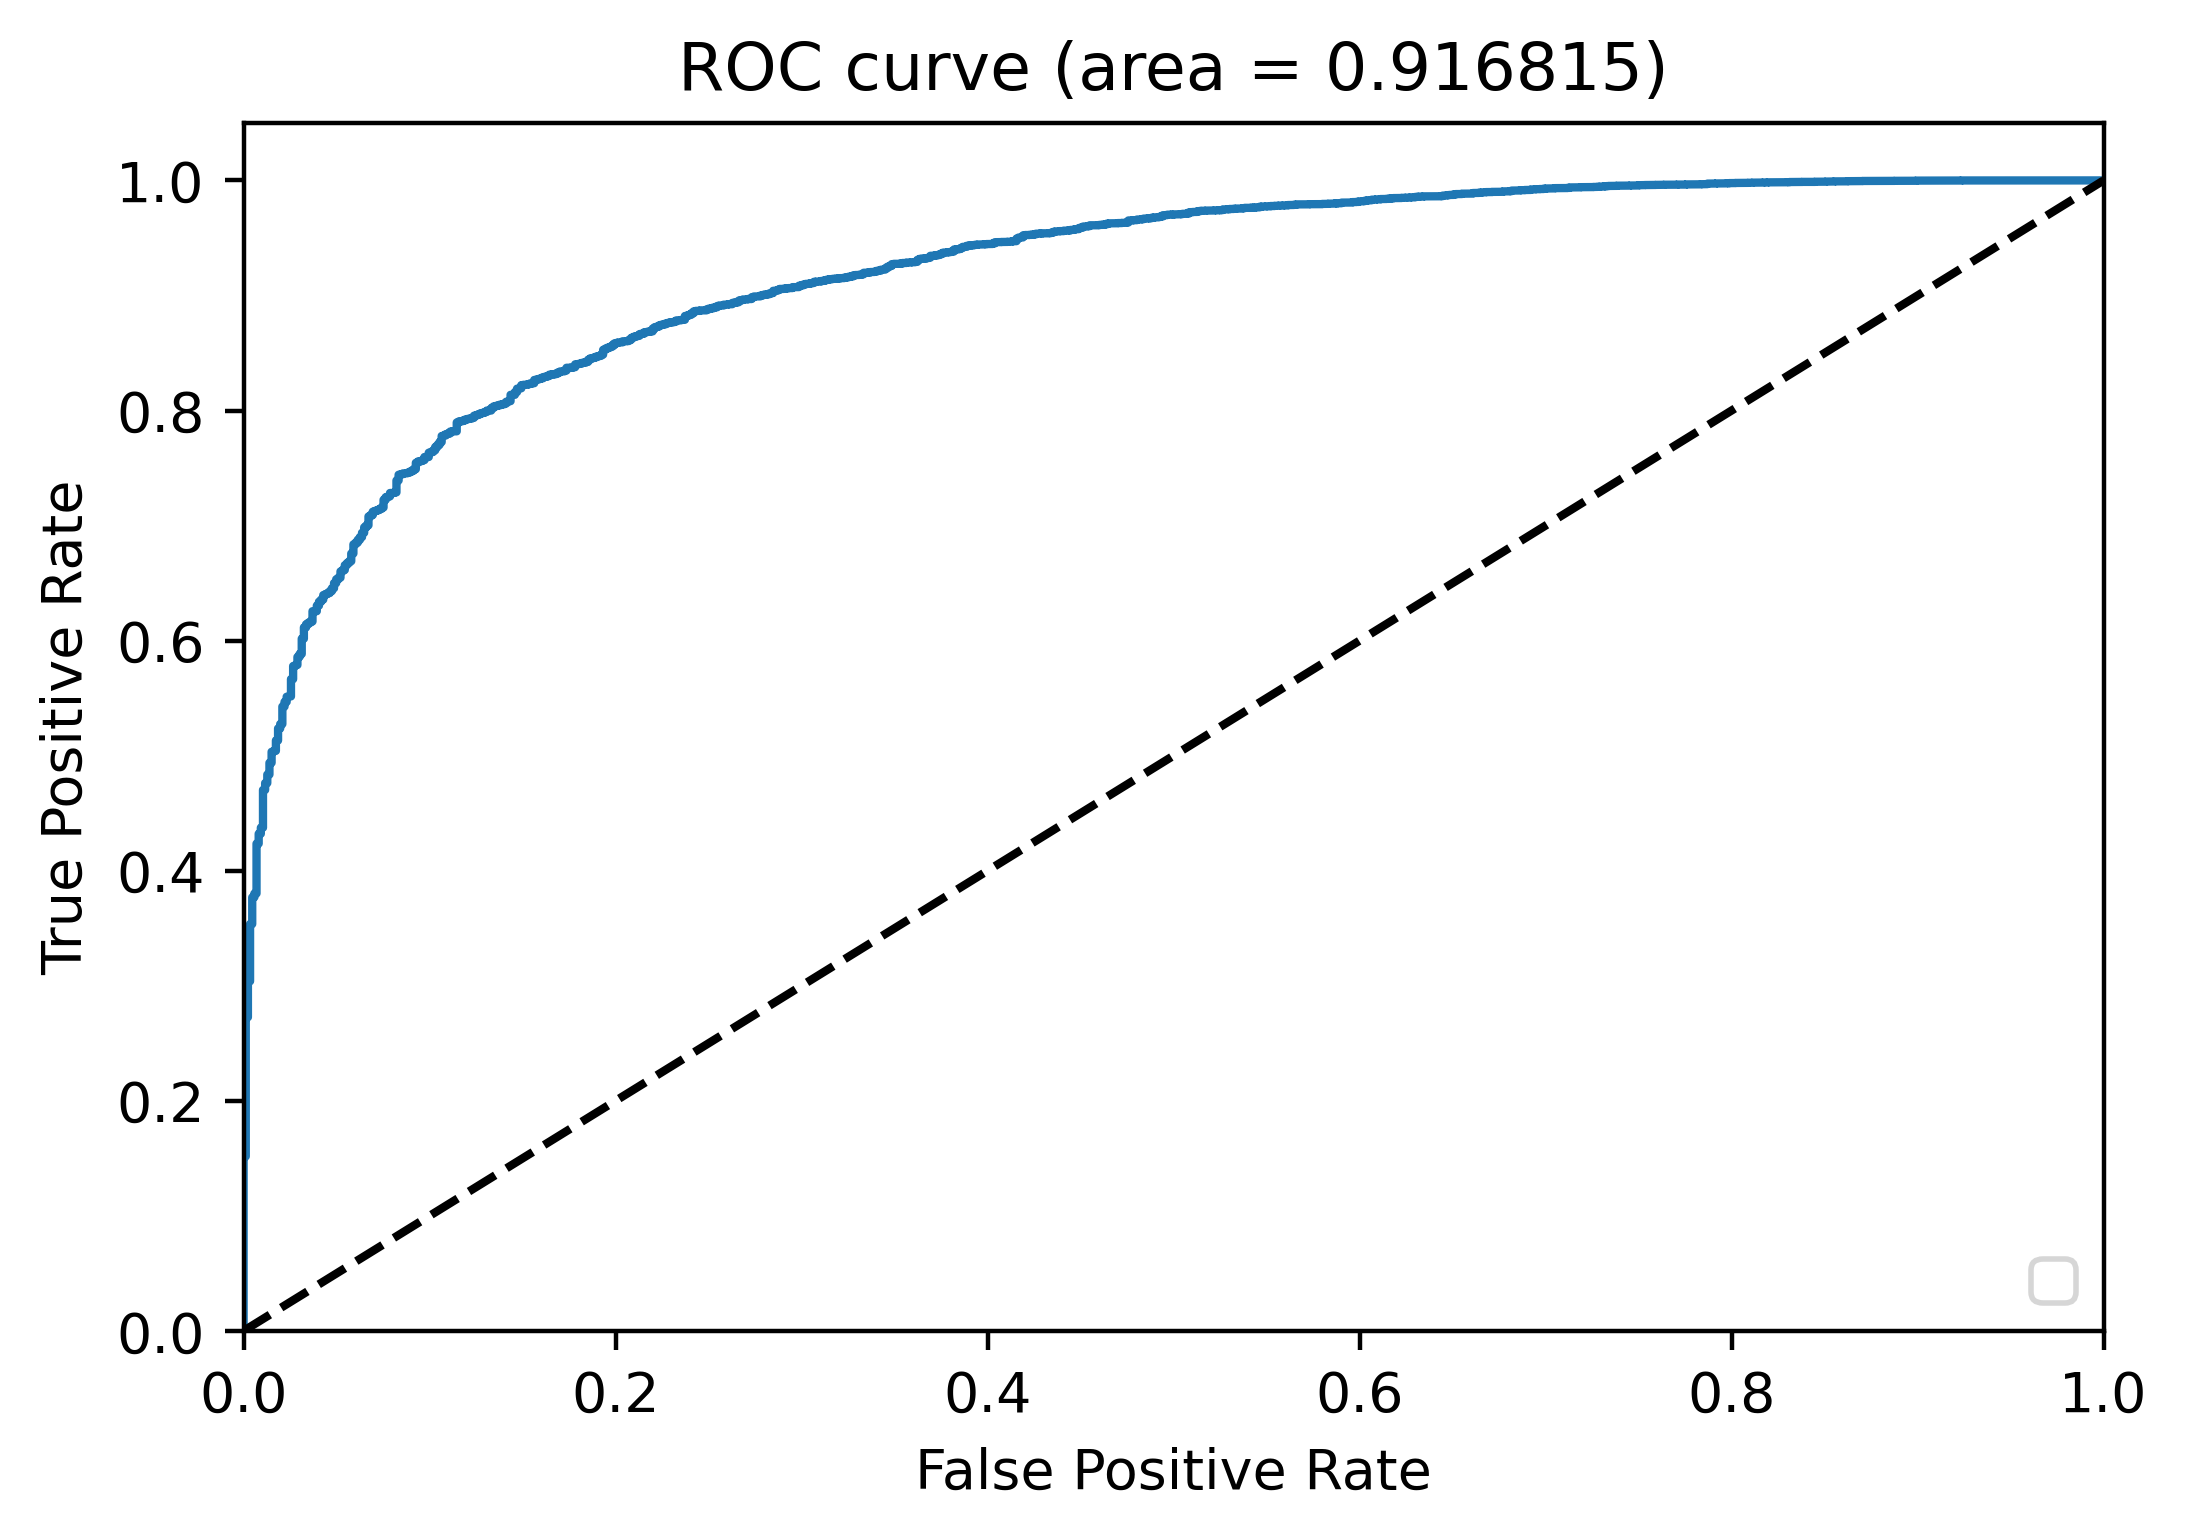

In [44]:
print('average_precision: '+format(average_precision))
print('roc_auc: ' + format(roc_auc))
print(classification_report(y_true, y_scores.round()))


def plot_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (area = %0.6f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.show()

plot_roc(fpr, tpr, roc_auc)

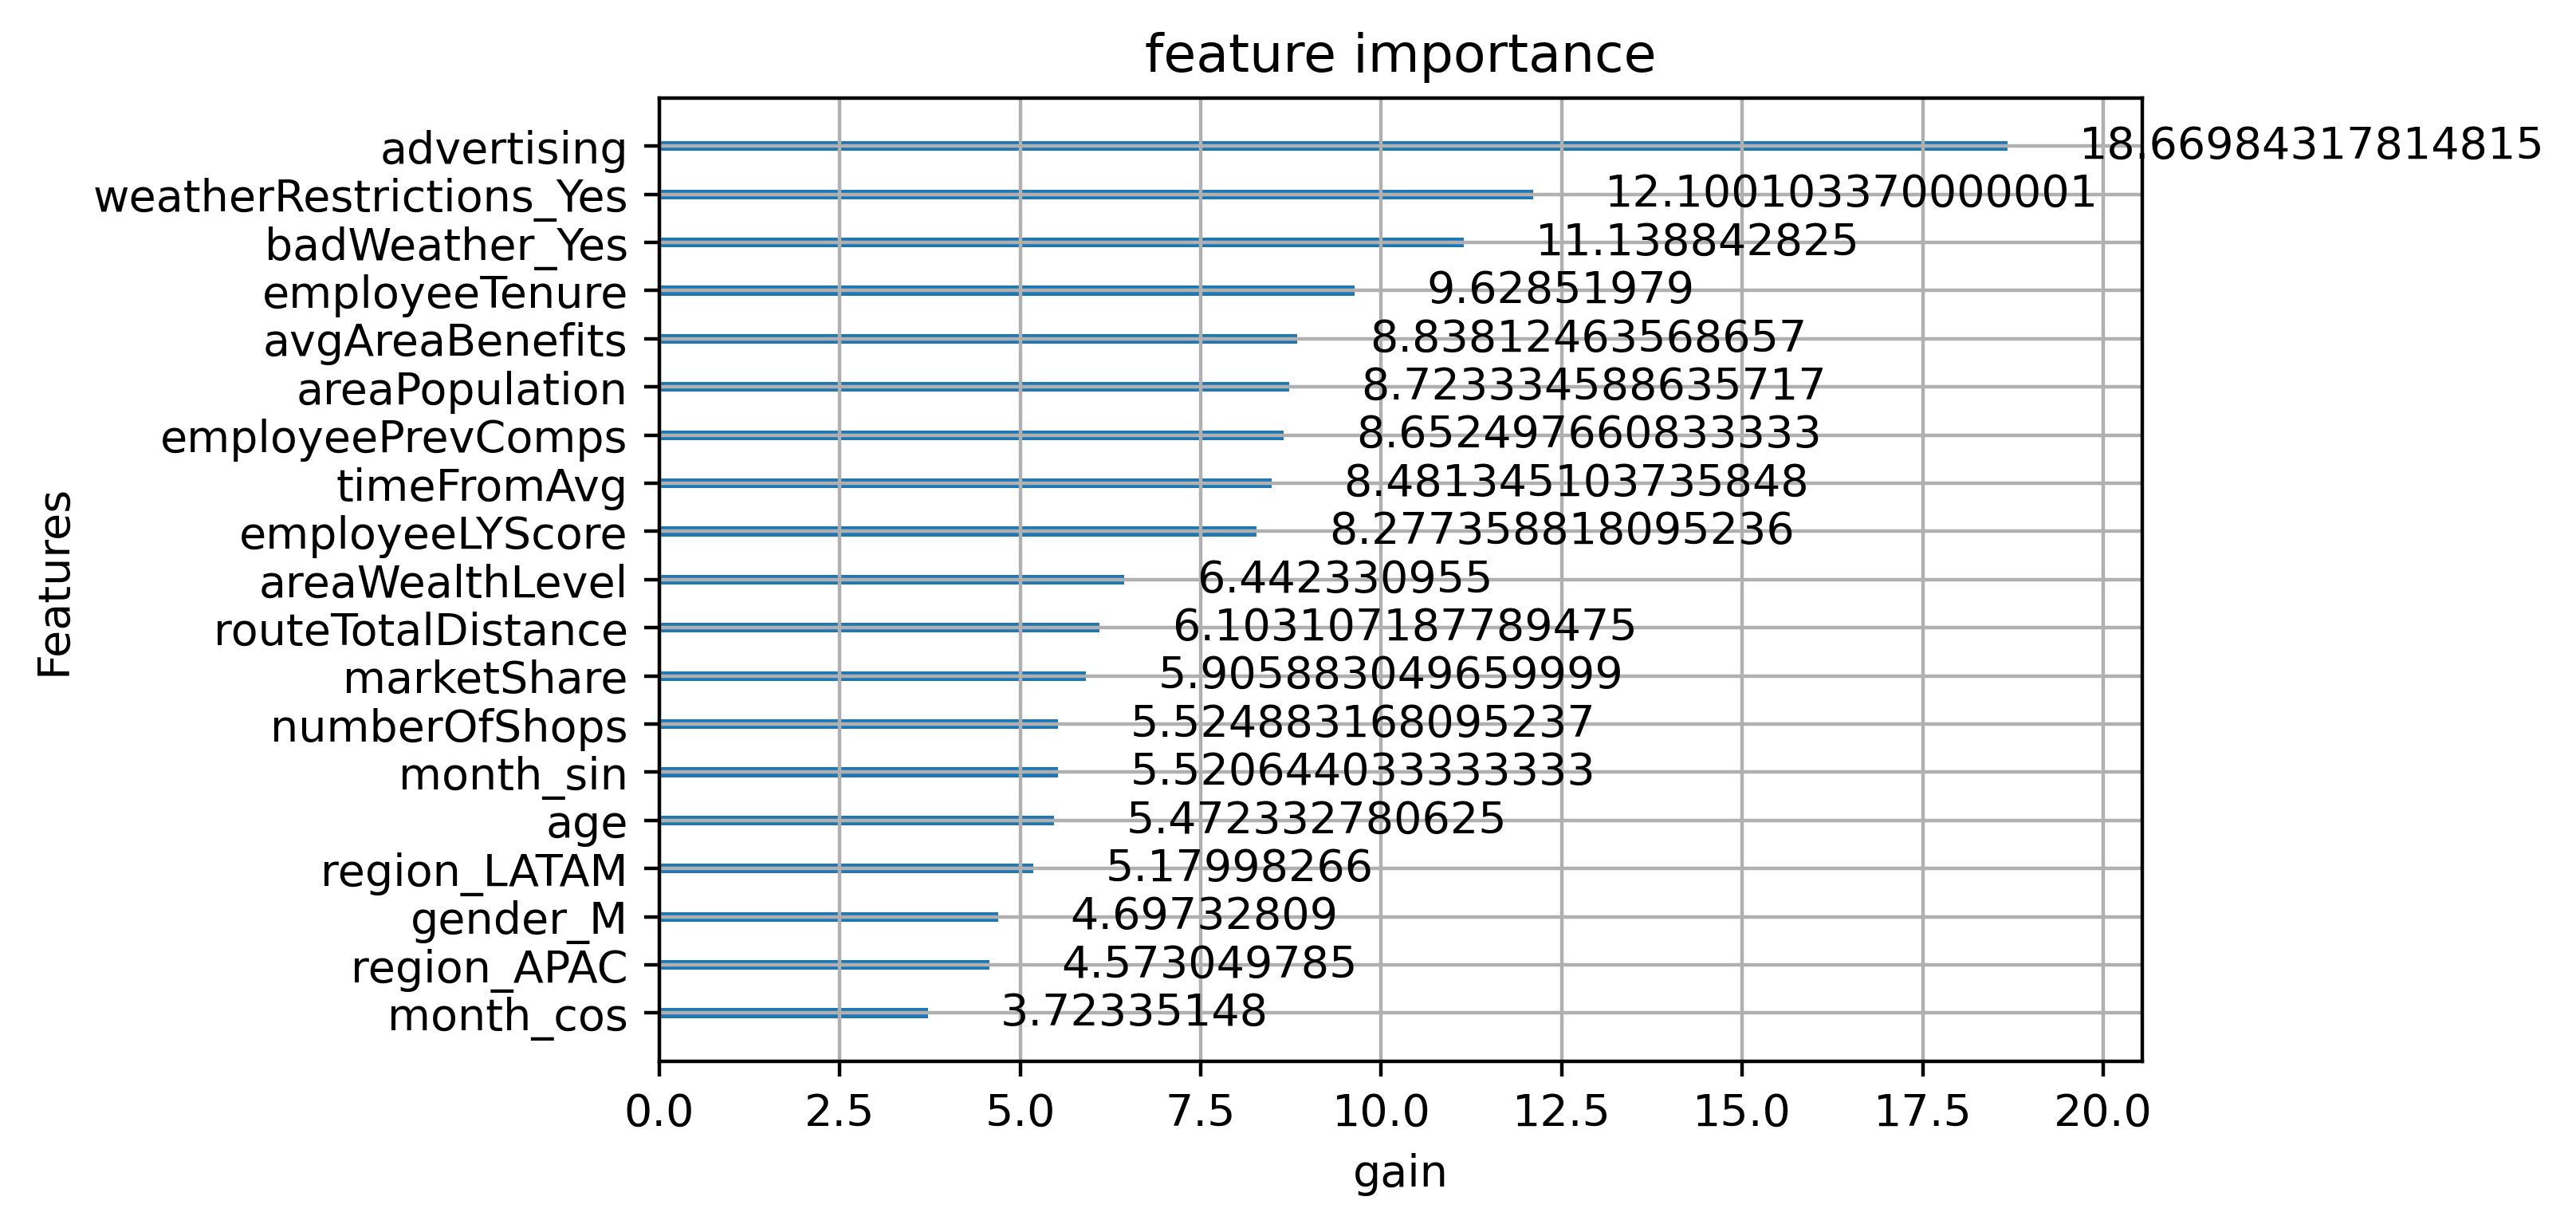

In [45]:
xgb.plot_importance(xgb.c, max_num_features=20 ,
                    importance_type='gain', 
                    xlabel='gain',title='feature importance')

plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400

#### Test Predition 

In [25]:
test_result = model.predict(X_test)
predict_result=pd.concat([test_id, pd.DataFrame(test_result,columns=['predict'])],axis=1)

import os  
os.makedirs('output', exist_ok=True)  
pd.DataFrame(test_result).to_csv('output/Lu_output.csv') 

In [26]:
predict_result

,anonID,predict
0,XLKC1691,1
1,KANY6459,1
2,YCOG1417,1
3,LRDT1582,1
4,NVNN3276,1
...,...,...
5873,PNQA6061,1
5874,XNSX3943,1
5875,FSXY6357,1
5876,XXFW2494,1
